<a href="https://colab.research.google.com/github/atcodedog32/ADR-Classification-through-tweet-senti-analysis-/blob/master/Indegene_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import the required libraries
import pandas as pd  
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import re # for regular expressions
pd.set_option("display.max_colwidth", 200)
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [0]:
#uploading the dataset on to colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Data.csv to Data (2).csv
User uploaded file "Data.csv" with length 3598619 bytes


In [0]:
#importing the dataset
train= pd.read_csv('Data.csv')

In [0]:
train.head() #looking at dataset 

,UserId,TweetId,Tweet,ADR_label
0,10030778,413205,Intravenous azithromycin-induced ototoxicity.,1
1,10048291,528244,"Immobilization, while Paget's bone disease was present, and perhaps enhanced activation of dihydrotachysterol by rifampicin, could have led to increased calcium-release into the circulation.",1
2,10048291,361834,Unaccountable severe hypercalcemia in a patient treated for hypoparathyroidism with dihydrotachysterol.,1
3,10082597,292240,METHODS: We report two cases of pseudoporphyria caused by naproxen and oxaprozin.,1
4,10082597,467101,METHODS: We report two cases of pseudoporphyria caused by naproxen and oxaprozin.,1


In [0]:
train[train['ADR_label'] == 0].count()  #NON ADR

UserId       16694
TweetId      16694
Tweet        16694
ADR_label    16694
dtype: int64

In [0]:
train[train['ADR_label'] == 1].count() #ADR

UserId       6822
TweetId      6822
Tweet        6822
ADR_label    6822
dtype: int64

In [0]:
train.shape  #checking the shape of dataset

(23516, 4)

In [0]:
train.ADR_label.value_counts() #ALTERNATIVE TO CHECK THE COUNTS OF CLASSES

0    16694
1     6822
Name: ADR_label, dtype: int64

Data Analysis

In [0]:
plot_size = plt.rcParams["figure.figsize"] #changing the default plot size to have a better view of the plots
print(plot_size[0])  
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

8.0
6.0


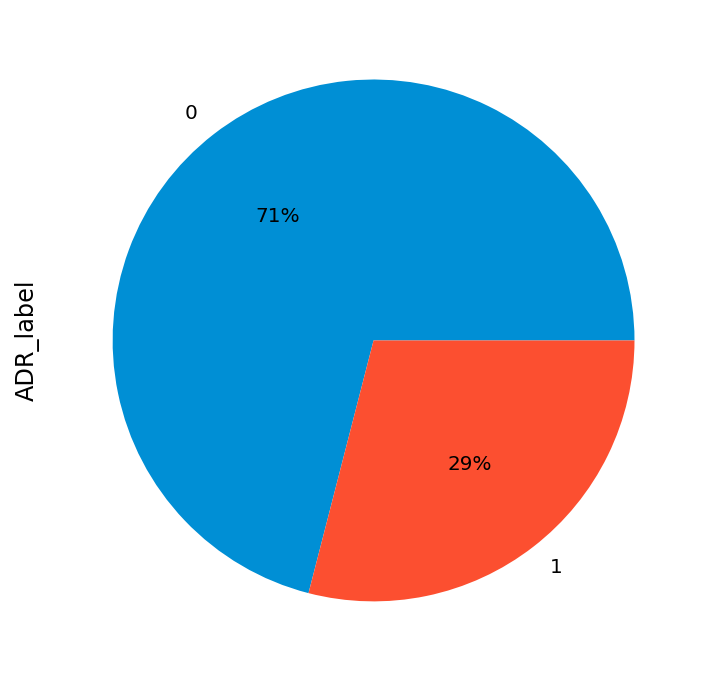

In [0]:
train.ADR_label.value_counts().plot(kind='pie', autopct='%1.0f%%') #plot for visualizing 

In [0]:
features = train.iloc[:, 2].values  #Our feature set will consist of tweets only. If we look at our dataset, the 3rd column contains the tweet text.
labels = train.iloc[:, 3].values    #The sentiment(ADR or non ADR) of the tweet is in the 4th column.

Data cleaning

In [0]:
processed_features = []  #preprocess data in order to clean it -> use regular expressions

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

Representing Text in Numeric Form

In [0]:
import nltk     
nltk.download("stopwords") 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

TfidfVectorizer class that can be used to convert text features into TF-IDF feature vectors.


In [0]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [0]:
from sklearn.model_selection import train_test_split    #Dividing Data into Training and Test Sets

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [0]:
from sklearn.ensemble import RandomForestClassifier    #Training the Model using the Random Forest algorithm

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
predictions = text_classifier.predict(X_test)  #Making Predictions on test dataset and Evaluating the Model

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[3224  109]
 [ 422  949]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      3333
           1       0.90      0.69      0.78      1371

    accuracy                           0.89      4704
   macro avg       0.89      0.83      0.85      4704
weighted avg       0.89      0.89      0.88      4704

0.8871173469387755


In [0]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,